In [3]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from nasa_power_request import request_parameters

In [ ]:
dataset = request_parameters(
    params='ALLSKY_SFC_SW_DWN',
    lon=3.997587,
    lat=-73.756138
        # date_range=[2020, 2024]
    )

### Defining parameters

In [2]:
param = "ALLSKY_SFC_SW_DWN"
lon, lat = 3.997587, -73.756138
min_date, max_date = 2005, 2025
is_header = "false"

### Entry point

In [3]:
url = f"https://power.larc.nasa.gov/api/temporal/monthly/point?start={min_date}&end={max_date}&latitude={lat}&longitude={lon}&community=re&parameters={param}&format=JSON&header={is_header}&time-standard=utc"


In [4]:
response = requests.get(url).json()


We could either remove "YYYY13" values, or with `csv` format just removing `ANN` column.

In [5]:
response["properties"]["parameter"][param]

{'200501': 9.02,
 '200502': 5.66,
 '200503': 2.32,
 '200504': 0.39,
 '200505': 0.0,
 '200506': 0.0,
 '200507': 0.0,
 '200508': 0.14,
 '200509': 1.43,
 '200510': 4.49,
 '200511': 8.64,
 '200512': 10.2,
 '200513': 3.52,
 '200601': 8.85,
 '200602': 5.5,
 '200603': 2.64,
 '200604': 0.41,
 '200605': 0.0,
 '200606': 0.0,
 '200607': 0.0,
 '200608': 0.12,
 '200609': 1.39,
 '200610': 4.26,
 '200611': 7.8,
 '200612': 10.25,
 '200613': 3.43,
 '200701': 9.17,
 '200702': 5.85,
 '200703': 2.64,
 '200704': 0.43,
 '200705': 0.0,
 '200706': 0.0,
 '200707': 0.0,
 '200708': 0.12,
 '200709': 1.36,
 '200710': 4.13,
 '200711': 7.28,
 '200712': 10.46,
 '200713': 3.45,
 '200801': 9.41,
 '200802': 6.01,
 '200803': 2.25,
 '200804': 0.39,
 '200805': 0.0,
 '200806': 0.0,
 '200807': 0.0,
 '200808': 0.13,
 '200809': 1.5,
 '200810': 3.94,
 '200811': 8.38,
 '200812': 10.2,
 '200813': 3.52,
 '200901': 8.93,
 '200902': 5.92,
 '200903': 2.37,
 '200904': 0.38,
 '200905': 0.0,
 '200906': 0.0,
 '200907': 0.0,
 '200908': 0.

In [6]:
clean_dict = {k: v for k, v in response["properties"]["parameter"][param].items() if k.endswith("13") is False}

### Setting dataframe

In [7]:
test_df = pd.DataFrame(
    {
        "date" : clean_dict.keys(),
        "value" : clean_dict.values(),
    }
)

test_df.tail(5)

,date,value
247,202508,-999.0
248,202509,-999.0
249,202510,-999.0
250,202511,-999.0
251,202512,-999.0


In [8]:
test_df["date"] = pd.to_datetime(test_df["date"], format="%Y%m")

In [9]:
test_df["month"] = test_df["date"].dt.month

In [10]:
test_df[["month", "value"]]

,month,value
0,1,9.02
1,2,5.66
2,3,2.32
3,4,0.39
4,5,0.00
...,...,...
247,8,-999.00
248,9,-999.00
249,10,-999.00
250,11,-999.00


In [11]:
test_df.shape[0]

252

### Handling missing values

In [12]:
test_df.loc[test_df["value"] <= 0, 'value'] = np.nan

In [13]:
test_df[test_df["value"].notna()].shape[0] / test_df.shape[0] * 100

69.44444444444444

In [14]:
test_df[test_df["value"].isna()].shape[0] / test_df.shape[0] * 100

30.555555555555557

In [15]:
# Copy of test_df
test_df2 = test_df.copy()
test_df2.value.interpolate(method="ffill").isna().sum()   

0

In [16]:
test_df2.value.interpolate(method='polynomial', order=3)

0      9.020000
1      5.660000
2      2.320000
3      0.390000
4     -0.562171
         ...   
247         NaN
248         NaN
249         NaN
250         NaN
251         NaN
Name: value, Length: 252, dtype: float64

In [17]:
test_df3 = test_df.copy()
test_df3.dropna(inplace=True)

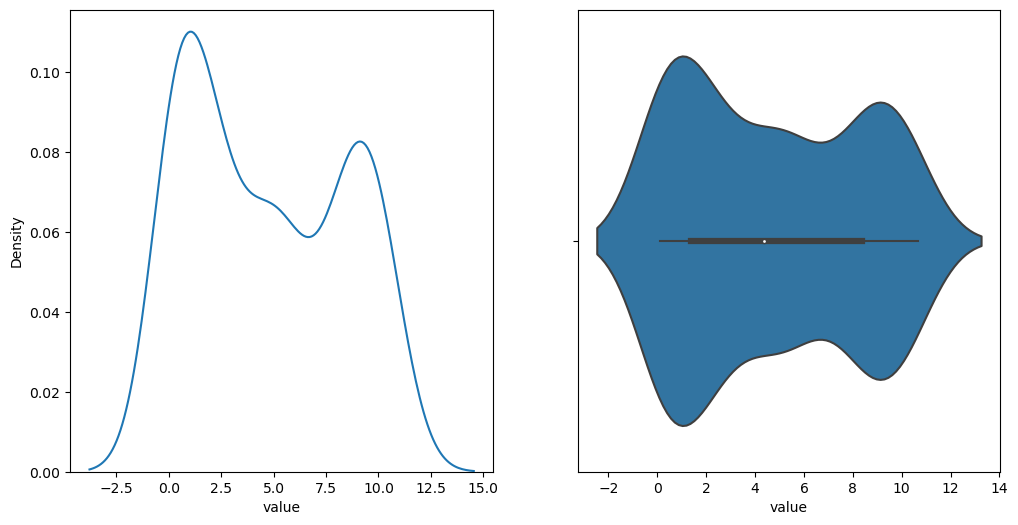

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=test_df2, x="value", ax=ax1)
sns.violinplot(data=test_df2, x="value", showfliers=True, ax=ax2)
plt.show()

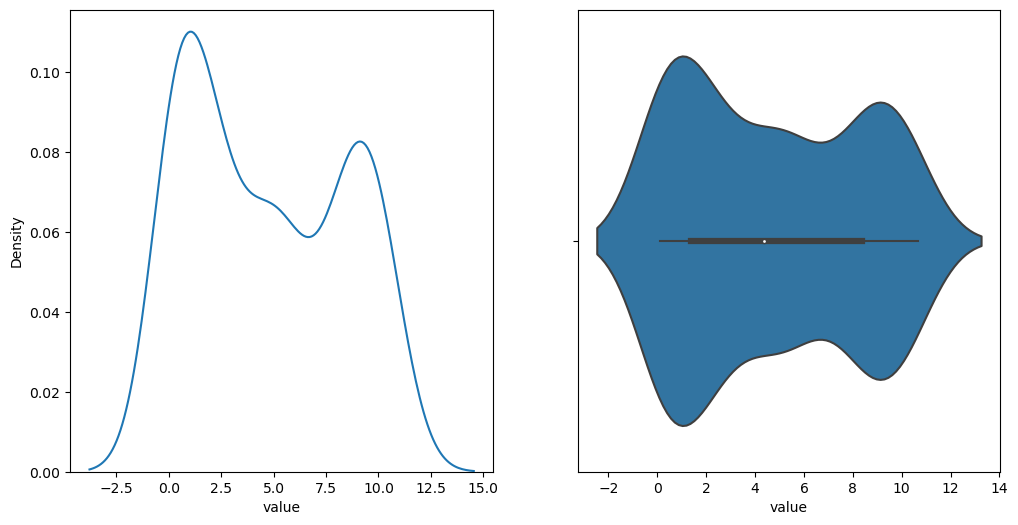

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=test_df3, x="value", ax=ax1)
sns.violinplot(data=test_df3, x="value", showfliers=True, ax=ax2)
plt.show()

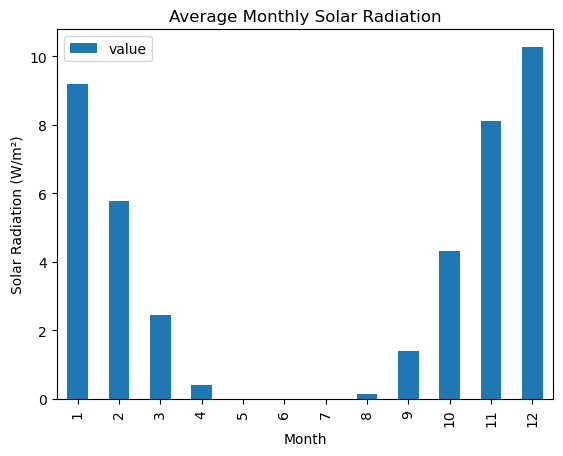

In [20]:
test_df2.groupby("month").mean(numeric_only=True).reset_index().plot(
    x="month",
    y="value",
    kind="bar",
    title="Average Monthly Solar Radiation",
    xlabel="Month",
    ylabel="Solar Radiation (W/m²)",
)
plt.show()

/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


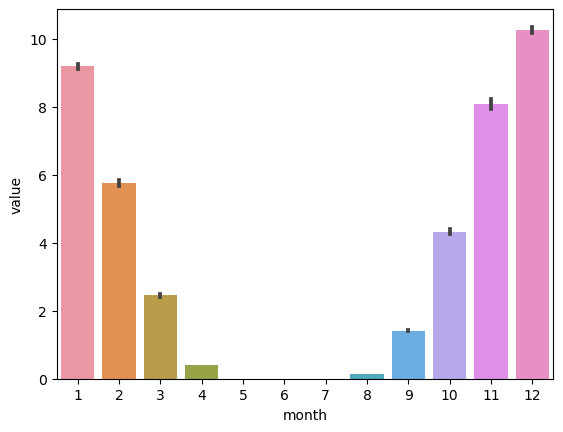

In [21]:
sns.barplot(data=test_df2, x="month", y="value", estimator=np.mean)
plt.show()

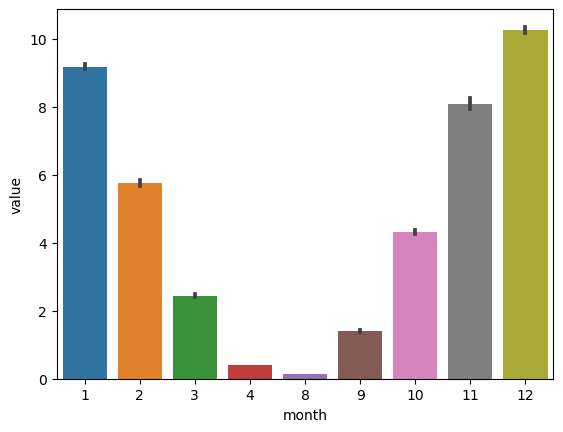

In [22]:
sns.barplot(data=test_df3, x="month", y="value", estimator=np.mean)
plt.show()

In [23]:
test_df2.groupby("month").mean(numeric_only=True).reset_index()

,month,value
0,1,9.192000
1,2,5.765000
2,3,2.450000
3,4,0.402500
4,5,NaN
5,6,NaN
6,7,NaN
7,8,0.133684
8,9,1.413684
9,10,4.324737


In [24]:
from scipy.stats import norm

In [25]:
mean_val = test_df2["value"].mean()
std_val = test_df2["value"].std()

In [26]:
mean_val_2 = test_df3["value"].mean()
std_val_2 = test_df3["value"].std()

In [27]:
mean_val, mean_val_2

(4.667714285714285, 4.667714285714285)

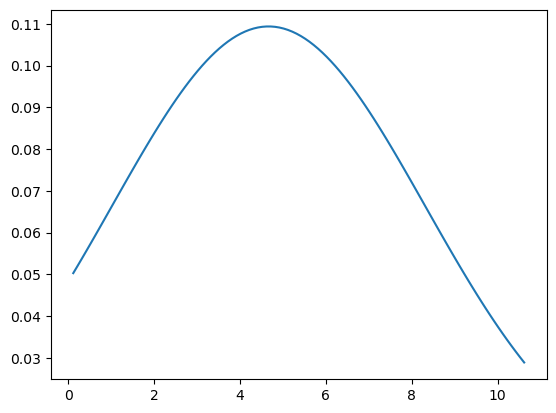

In [28]:
norm_dist = norm.pdf(
    np.arange(test_df2["value"].min(), test_df2["value"].max(), 0.1),
    loc=mean_val,
    scale=std_val,
)
plt.plot(
    np.arange(test_df2["value"].min(), test_df2["value"].max(), 0.1),
    norm_dist,
    label="Normal Distribution",
)

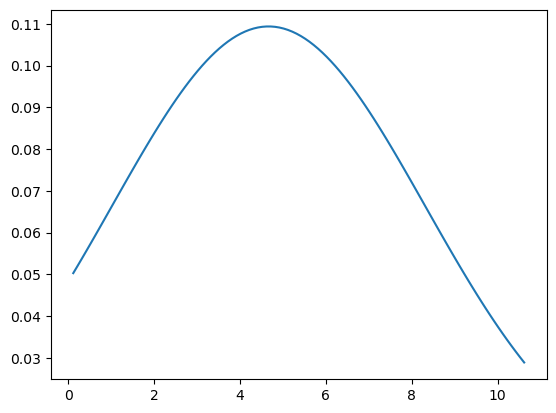

In [29]:
norm_dist = norm.pdf(
    np.arange(test_df3["value"].min(), test_df2["value"].max(), 0.1),
    loc=mean_val_2,
    scale=std_val_2,
)
plt.plot(
    np.arange(test_df3["value"].min(), test_df2["value"].max(), 0.1),
    norm_dist,
    label="Normal Distribution",
)

### Calculate PVOUT

In [46]:
pr = 0.81
yearly_irr = mean_val_2 * 365.25 #kWh/m²/year
pvout = yearly_irr * pr #kWh/kWp/year

In [47]:
pvout

1380.9549407142856

In [48]:
consumption = 300 #kWh/month
required_pv_power = (consumption * 12) / pvout #kWp
required_pv_power

2.606891719535711

#### Calculating produced energy based in Trina Vertex TSMNE19

In [53]:
# Amount of modules
nominal_trina_power = 0.620 #kWp
no_modules = round(required_pv_power / nominal_trina_power) + 1

In [54]:
no_modules # round up to the next whole number

5

In [56]:
efficiency = 0.2315
ind_area = 2.58 * no_modules
energy_produced = yearly_irr * ind_area * efficiency * pr
energy_produced

4124.014787202107